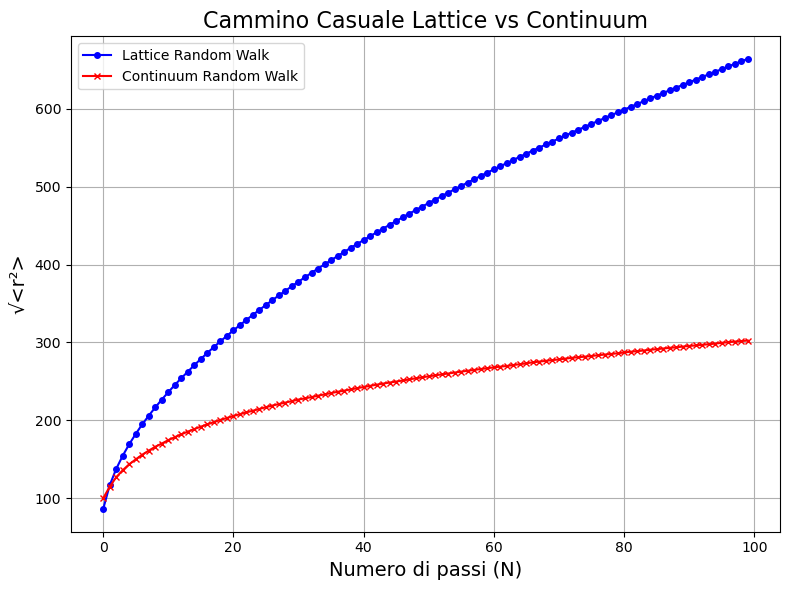

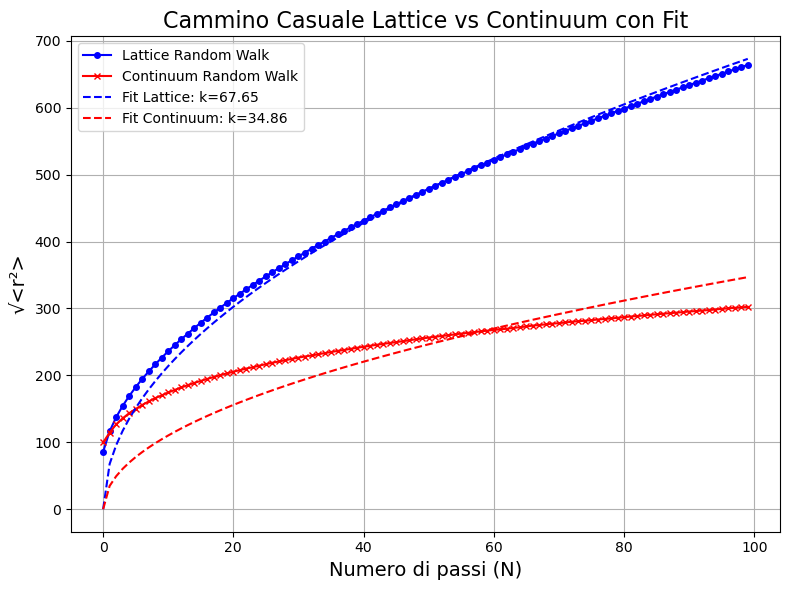

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati dal file di output
data = np.loadtxt("random_walk_results.dat")

# Estrai le colonne: passi (N), distanze per il cammino lattice e continuum
N_steps = data[:, 0]
r_lattice = data[:, 1]
r_continuum = data[:, 2]

# Calcola la radice quadrata della media quadratica per ogni passo (√<r^2>)
sqrt_r_lattice = np.sqrt(r_lattice)
sqrt_r_continuum = np.sqrt(r_continuum)

# Crea il grafico
plt.figure(figsize=(8, 6))

# Plot dei cammini lattice e continuum
plt.plot(N_steps, sqrt_r_lattice, label="Lattice Random Walk", color='blue', marker='o', markersize=4)
plt.plot(N_steps, sqrt_r_continuum, label="Continuum Random Walk", color='red', marker='x', markersize=4)

# Aggiungi etichette e titolo
plt.xlabel("Numero di passi (N)", fontsize=14)
plt.ylabel("√<r²>", fontsize=14)
plt.title("Cammino Casuale Lattice vs Continuum", fontsize=16)
plt.legend()

# Mostra il grafico
plt.grid(True)
plt.tight_layout()
plt.show()

# Aggiungi un fit (per esempio, k√N per entrambi i cammini)
from scipy.optimize import curve_fit

# Definisci la funzione per il fit: k * sqrt(N)
def fit_function(N, k):
    return k * np.sqrt(N)

# Esegui il fit per il cammino lattice
params_lattice, covariance_lattice = curve_fit(fit_function, N_steps, sqrt_r_lattice)
# Esegui il fit per il cammino continuum
params_continuum, covariance_continuum = curve_fit(fit_function, N_steps, sqrt_r_continuum)

# Plot del fit
plt.figure(figsize=(8, 6))
plt.plot(N_steps, sqrt_r_lattice, label="Lattice Random Walk", color='blue', marker='o', markersize=4)
plt.plot(N_steps, sqrt_r_continuum, label="Continuum Random Walk", color='red', marker='x', markersize=4)

# Aggiungi i fit
plt.plot(N_steps, fit_function(N_steps, *params_lattice), label=f"Fit Lattice: k={params_lattice[0]:.2f}", color='blue', linestyle='--')
plt.plot(N_steps, fit_function(N_steps, *params_continuum), label=f"Fit Continuum: k={params_continuum[0]:.2f}", color='red', linestyle='--')

# Aggiungi etichette e titolo
plt.xlabel("Numero di passi (N)", fontsize=14)
plt.ylabel("√<r²>", fontsize=14)
plt.title("Cammino Casuale Lattice vs Continuum con Fit", fontsize=16)
plt.legend()

# Mostra il grafico
plt.grid(True)
plt.tight_layout()
plt.show()
